In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [10]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim, from_numpy
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_excel("data/Concrete_Data.xls")

In [4]:
numarr = data.to_numpy()

In [5]:
numarr.shape

(1030, 9)

In [112]:
data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [113]:
columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
data.columns = columns
data

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [114]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

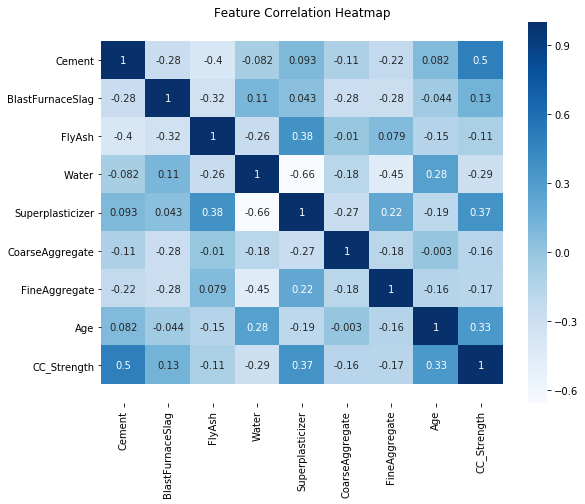

In [115]:
corr = data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Compressive Strength Distribution')

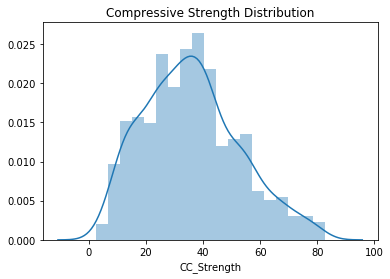

In [116]:
ax = sns.distplot(data.CC_Strength)
ax.set_title("Compressive Strength Distribution")

In [117]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

In [118]:
X.shape, y.shape

((1030, 8), (1030,))

Split the data into training and testing with 80:20 ratio

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [120]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [122]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

### Using Pytorch custo Dataset DataLoader

In [16]:
BATCH_SIZE = 32

In [166]:
class CompStrengthDS(Dataset):
    def __init__(self):
        data = pd.read_excel("data\\Concrete_Data.xls")
        X = data.iloc[:, :-1]
        sc = StandardScaler()
        X = sc.fit_transform(X)
        y = data.iloc[:, -1]
        y = sc.fit_transform(y.values.reshape(-1,1))
        self.len = X.shape[0]
        self.x_data = from_numpy(X)
        self.y_data = from_numpy(y)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [167]:
dataset = CompStrengthDS()
first_data = dataset[0]
features, labels = first_data
print(features, labels)
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

tensor([ 2.4779, -0.8569, -0.8471, -0.9167, -0.6202,  0.8632, -1.2177, -0.2797],
       dtype=torch.float64) tensor([2.6452], dtype=torch.float64)


### Splitting the data into training and testing (Not used in the training)

In [118]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataset_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [68]:
len(train_dataset), len(test_dataset)

(824, 206)

# Samples per batch
### 1030 = 32 * 32 + 6 (Last Batch)

In [202]:
32 * 32 + 6

1030

In [119]:
for i , (images, labels) in enumerate(dataloader):
    print(i, len(images) )

0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 32
9 32
10 32
11 32
12 32
13 32
14 32
15 32
16 32
17 32
18 32
19 32
20 32
21 32
22 32
23 32
24 32
25 32
26 32
27 32
28 32
29 32
30 32
31 32
32 6


In [168]:
batch_size = 32
num_epochs = 100
learning_rate = 0.01
size_hidden= 100

In [169]:
batch_no = len(dataset) // batch_size  #batches
cols=len(dataset.x_data[0]) #Number of columns in input matrix
print('Number of columns: {}'.format(cols))
n_output=1

Number of columns: 8


In [170]:
batch_no

32

In [171]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)

Executing the model on : cpu


In [172]:
cols,size_hidden, n_output

(8, 100, 1)

In [173]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        #print(self.hidden.weight.size())
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

In [174]:
print(net.parameters())

print(len(list(net.parameters())))

# hidden Parameters 
print(list(net.parameters())[0].size())

# hidden Bias Parameters
print(list(net.parameters())[1].size())

# predict Parameters
print(list(net.parameters())[2].size())


# predict Bias Parameters
print(list(net.parameters())[3].size())


<generator object Module.parameters at 0x0000027DCBCF32C8>
4
torch.Size([100, 8])
torch.Size([100])
torch.Size([1, 100])
torch.Size([1])


In [175]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(size_average=False)  # this is for regression mean squared loss

C:\Users\suagrawa\AppData\Local\Continuum\anaconda3\envs\Optimization-Python\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [176]:
#Change to numpy arraay. 
#X_train=X_train.ravel()
#y_train=y_train.ravel()
#X_test=X_test.ravel()
#y_test=y_test.ravel()

In [177]:
iter = 0
for epoch in range(num_epochs):
    for i , (features, labels) in enumerate(dataloader):

        features = features.requires_grad_()
        #Clear gradients w.r.t to parameters
        optimizer.zero_grad()

        ## forward pass
        outputs = net.forward(features.float())
        #
        # Calculate Loss : Mean Sqaure loss
        loss = criterion(outputs, labels.float())
        #
        # Getting graidents w.r.t to parameters
        loss.backward()
        #
        # Updating Parameters
        optimizer.step()
        print(loss)

tensor(24.8143, grad_fn=<MseLossBackward>)
tensor(23.5920, grad_fn=<MseLossBackward>)
tensor(20.5949, grad_fn=<MseLossBackward>)
tensor(14.1290, grad_fn=<MseLossBackward>)
tensor(21.9017, grad_fn=<MseLossBackward>)
tensor(18.7274, grad_fn=<MseLossBackward>)
tensor(11.2204, grad_fn=<MseLossBackward>)
tensor(22.7280, grad_fn=<MseLossBackward>)
tensor(20.8122, grad_fn=<MseLossBackward>)
tensor(20.6861, grad_fn=<MseLossBackward>)
tensor(23.2952, grad_fn=<MseLossBackward>)
tensor(13.6728, grad_fn=<MseLossBackward>)
tensor(10.5461, grad_fn=<MseLossBackward>)
tensor(12.0492, grad_fn=<MseLossBackward>)
tensor(11.3097, grad_fn=<MseLossBackward>)
tensor(10.0585, grad_fn=<MseLossBackward>)
tensor(20.3860, grad_fn=<MseLossBackward>)
tensor(9.2362, grad_fn=<MseLossBackward>)
tensor(8.5946, grad_fn=<MseLossBackward>)
tensor(9.6187, grad_fn=<MseLossBackward>)
tensor(10.5590, grad_fn=<MseLossBackward>)
tensor(18.6955, grad_fn=<MseLossBackward>)
tensor(17.1731, grad_fn=<MseLossBackward>)
tensor(11.3444

In [178]:
net.eval()

Net(
  (hidden): Linear(in_features=8, out_features=100, bias=True)
  (predict): Linear(in_features=100, out_features=1, bias=True)
)

In [179]:
for i,parameter in enumerate(net.parameters()):
    print(i,parameter)

0 Parameter containing:
tensor([[ 2.0057e-01,  1.9084e-01,  2.3405e-01, -2.3406e-01,  1.5716e-02,
          4.0977e-02, -1.1069e-02,  9.2374e-02],
        [-6.8439e-01,  5.9833e-01,  2.6254e-01, -4.8132e-01,  5.4705e-02,
          6.9721e-01,  4.8286e-01,  2.3051e-01],
        [-2.6728e-01,  1.5577e-01, -2.9071e-01,  8.7986e-01,  3.8007e-01,
         -5.7246e-02, -2.8805e-01, -8.1492e-02],
        [ 3.8786e-01,  4.3600e-01, -3.4495e-01,  4.2377e-01, -5.6789e-02,
         -3.3557e-01, -3.8868e-01,  5.0411e-02],
        [-2.5553e-01, -3.1726e-01, -6.2162e-01,  1.9974e-01,  1.3485e-01,
         -6.0287e-01, -6.9071e-02,  3.7363e-01],
        [ 1.1263e-01, -6.2333e-04, -1.2943e-01,  2.1020e-01,  7.9266e-02,
         -1.0166e-02, -8.3995e-03, -5.4034e-01],
        [ 1.8586e-01,  2.7574e-01,  1.6710e-01,  1.0980e-01, -5.7860e-02,
          9.2291e-02,  2.5709e-01,  7.7295e-02],
        [ 3.3212e-01,  3.1509e-01,  4.5747e-01,  1.0197e-01,  5.6708e-02,
         -5.7892e-02,  8.9271e-02, -1.569

In [206]:
from torch.autograd import Variable
new_variable = Variable(torch.Tensor([[540.0,0.0, 0.0,162.0,2.5, 1040.0, 676.0 , 28 ]]))
#new_variable = Variable(torch.Tensor([[2.4779, -0.8569, -0.8471, -0.9167, -0.6202,  0.8632, -1.2177, -0.2797 ]]))

In [207]:
prediction_y = net(new_variable)

In [208]:
prediction_y

tensor([[-145.0981]], grad_fn=<AddmmBackward>)

### Split the data into training and testing